In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

recipes = pd.read_csv('RAW_recipes.csv')
print(recipes.head())
interactions = pd.read_csv('RAW_interactions.csv')
print(interactions.head())

                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [

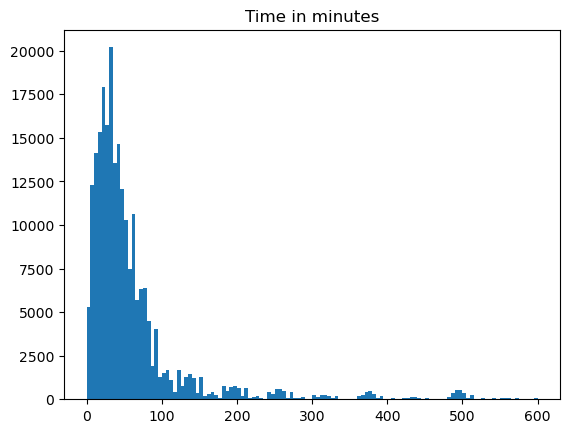

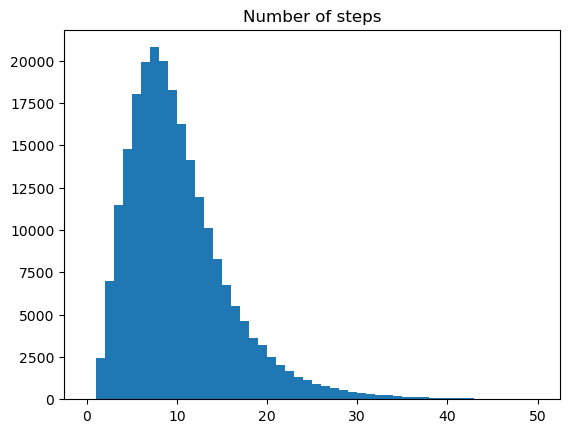

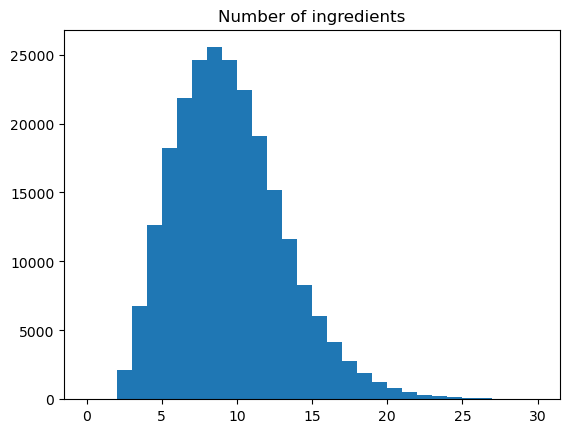

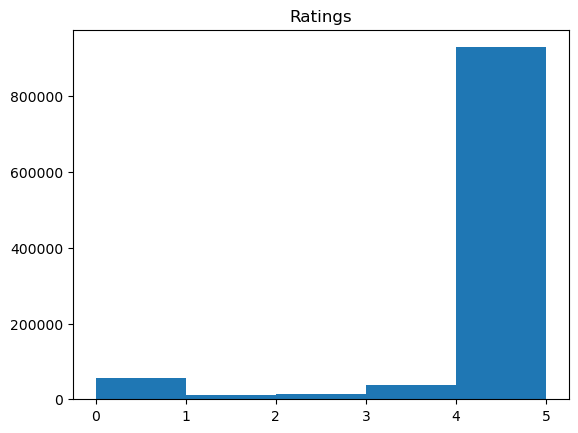

In [75]:
plt.hist(recipes['minutes'], 120, range = (0,600))
plt.title('Time in minutes')
plt.savefig('Time')
plt.show()

plt.hist(recipes['n_steps'],50, range = (0,50))
plt.title('Number of steps')
plt.savefig('N_steps')
plt.show()

plt.hist(recipes['n_ingredients'],30,range = (0,30))
plt.title('Number of ingredients')
plt.savefig('N_ingridients')
plt.show()

plt.hist(interactions['rating'],5)
plt.title('Ratings')
plt.savefig('Ratings')
plt.show()

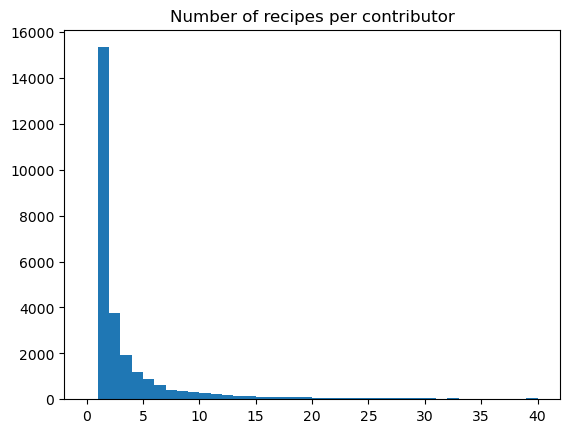

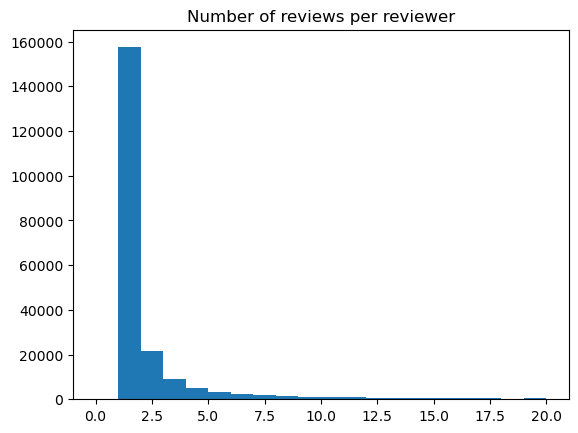

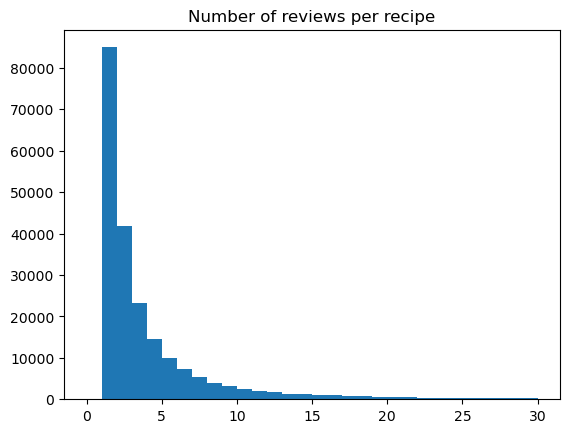

In [115]:
from collections import Counter

c = Counter(recipes['contributor_id'])
plt.hist(c.values(),40, range = (0,40))
plt.title('Number of recipes per contributor')
plt.savefig('Recipes_per_contributor')
plt.show()

c = Counter(interactions['user_id'])
plt.hist(c.values(),20, range = (0,20))
plt.title('Number of reviews per reviewer')
plt.savefig('Reviews_per_reviewer')
plt.show()

c = Counter(interactions['recipe_id'])
plt.hist(c.values(),30, range = (0,30))
plt.title('Number of reviews per recipe')
plt.savefig('Reviews_per_recipe')
plt.show()

In [141]:
mean_ratings = np.zeros(len(recipes))
mean_rating = np.mean(interactions['rating'].values)
i = 0
for id in recipes['id']:
    ratings = interactions[interactions['recipe_id'] == id]['rating'].values
    if np.size(ratings) == 0:
        mean_ratings[i] = mean_rating
    else:
        mean_ratings[i] = np.mean(ratings)
    i += 1
print(mean_ratings)

[5.  3.5 4.  ... 5.  1.  2. ]


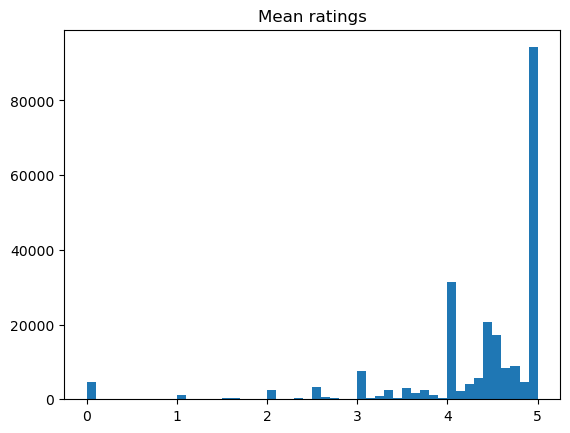

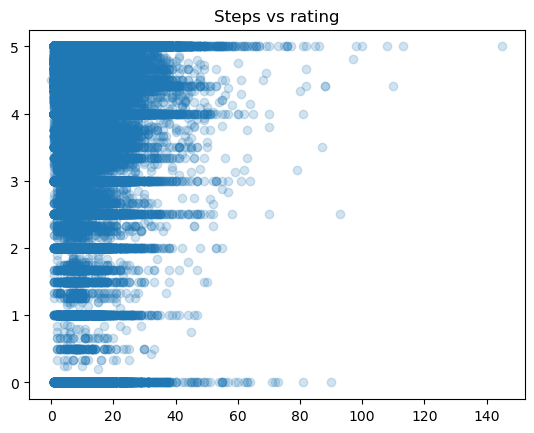

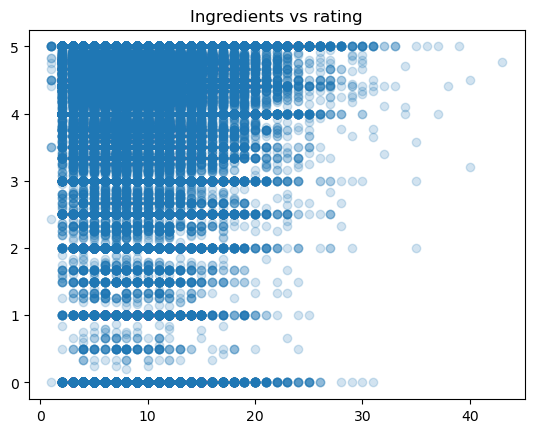

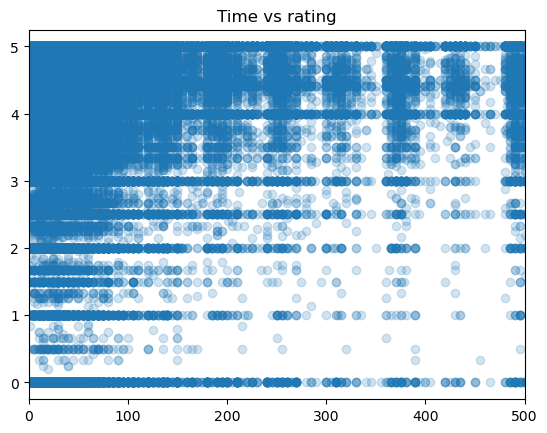

In [149]:
plt.hist(mean_ratings, 50)
plt.title('Mean ratings')
plt.savefig('Mean_ratings')
plt.show()

plt.scatter(recipes['n_steps'],mean_ratings,alpha = 0.2)
plt.title('Steps vs rating')
plt.savefig('Steps_vs_rating')
plt.show()

plt.scatter(recipes['n_ingredients'],mean_ratings,alpha = 0.2)
plt.title('Ingredients vs rating')
plt.savefig('Ingredients_vs_rating')
plt.show()

plt.scatter(recipes['minutes'],mean_ratings,alpha = 0.2)
plt.xlim((0,00))
plt.title('Time vs rating')
plt.savefig('Time_vs_rating')
plt.show()